## Get all the imports here

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from vevestaX import vevesta as v
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score

In [2]:
dir(load_wine())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
df=pd.concat([pd.DataFrame(load_wine().data,columns=load_wine().feature_names),pd.DataFrame(load_wine().target,columns=['target'])],axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.target.unique()

array([0, 1, 2])

In [5]:
V=v.Experiment()

In [6]:
V.ds=df
V.ds

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

## Load Data

In [7]:
from sklearn.model_selection import train_test_split
randomstate=27
train,test=train_test_split(df,test_size=0.2,random_state=randomstate)

In [8]:
x_train=train.drop(['target'],axis=1)
y_train=train['target']
x_test=test.drop(['target'],axis=1)
y_test=test['target']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(142, 13) (142,) (36, 13) (36,)


## Feature Reduction Using Principal Component Analysis

In [9]:
#For the purpose of visualization; we are using pca in order to reduce the features to 2 so that we can visualize the k mean clustering.

from sklearn.decomposition import PCA
pca = PCA(2)

train_pca=pca.fit_transform(x_train)
train_pca_df=pd.DataFrame(train_pca)
print(train_pca_df.shape)

test_pca=pca.fit_transform(x_test)
test_pca_df=pd.DataFrame(test_pca)
print(test_pca_df.shape)

(142, 2)
(36, 2)


## Grabbing the Baseline Score

In [10]:
clusters=3
randomstate=42

model_kmeans = KMeans(n_clusters=clusters, random_state=randomstate)
model_kmeans.fit(train_pca_df)

train_pred=model_kmeans.predict(train_pca_df)
baseline_score_train = normalized_mutual_info_score(y_train,train_pred)
print('Baseline Score Train : ',baseline_score_train)

test_pred=model_kmeans.predict(test_pca_df)
baseline_score_test = normalized_mutual_info_score(y_test,test_pred)
print('Baseline Score Test : ',baseline_score_test)

Baseline Score Train :  0.4304769390811183
Baseline Score Test :  0.404032720618212


## Centroids of the Cluster

In [11]:
model_kmeans.cluster_centers_
cluster_df=pd.DataFrame(model_kmeans.cluster_centers_,index=['C1','C2','C3'])
cluster_df

,0,1
C1,438.925109,-1.783173
C2,-304.668155,-1.995117
C3,-31.214497,4.241360


## Visualization

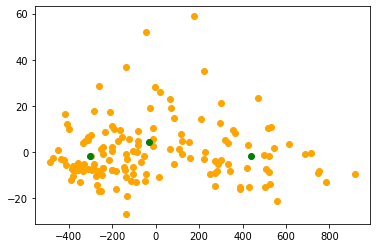

In [12]:
plt.scatter(train_pca_df[0],train_pca_df[1],color='orange')
plt.scatter(cluster_df[0],cluster_df[1],color='green')

## Dump the Experiment

In [13]:
V.dump(techniqueUsed='K-Mean',filename="vevestaDump.xlsx",message="precision is tracked",version=1)

Dumped the experiment in the file vevestaDump.xlsx
Find the right technique for your Machine Learning project at https://www.vevesta.com?utm_source=vevestaX
